# 대표적인 이산형 확률분포

추측통계 : 한정된 표본으로부터 모집단의 평균이나 분산 등의 지표를 추정하는 것

 - 비모수적 기법 : 모집단의 확률 분포에 아무런 가정을 하지 않는 것
 - 모수적 기법 : 모집단의 확률 분포가 '어떠한 형태를 지닐 것이다.'라고 가정하고 확률분포의 기댓값이나 분산을 결정하는 파라미터를 추측하는 방법
  --> 모수적 기법은 추정이 간단하고 분석이 쉬운 모형을 만들 수 있다.
  
 

In [2]:
# scipy 라이브러리
# 통계 계산을 위한 여러 도구를 가지고 있는 라이브러리


import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

* lambda 함수
 - 임시로 만드는 함수?

In [3]:
# 그래프 선의 종류
linestyles = ['-', '--', ':']

# 기댓값 함수
# 각 확률분포함수에 대해 기댓값을 구할 수 있게 설정
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

# 분산 함수
# 각 확률분포함수에 대해 분산을 구할 수 있게 설정
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

# 기댓값, 분산 return 함수
# 위의 E, V 함수가 여기에서 사용된다.
def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    # assert = try, except같은 느낌이라고 생각하면 된다.
    # assert 다음부분을 만족하지 못하면 오른쪽 문구 출력
    # 만족할 경우 그냥 pass
    assert np.all(prob >= 0), 'minus probability'
    
    # numpy, 소수점 6째자리까지 반올림
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    
    # 기댓값, 분산 출력
    print(f'expected value {E(X):.4}')   # 소수점 4자리까지
    print(f'variance {(V(X)):.4}')


# 확률함수와 기댓값을 그리기 위한 plot 함수
def plot_prob(X):
    x_set, f = X
    
    # prob는 각 x에 대한 확률을 array로 만듬.
    prob = np.array([f(x_k) for x_k in x_set])
    
    # 크기 설정
    fig = plt.figure(figsize=(10, 6))
    # 1,1,1 subplot
    ax = fig.add_subplot(111)
    
    
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

## 베르누이 분포

* Bernoulli distribution
 - 확률 변수가 취할 수 있는 값이 0, 1밖에 없는 분포이다.
 - 1이 나오면 성공, 0이 나오면 실패

 - 확률변수가 취할 수 있는 값은 2가지, 2가지 확률변수의 확률의 총합 = 1
 - 1이 나오는 확률을 p라고 하면, 
 - 1이 나오지 않는 확률은 1-p

* 확률변수가 취할 수 있는 값이 2가지 밖에 없는 것 = 베르누이 분포

In [4]:
# 베르누이 분포 함수 구현

def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [5]:
p = 0.3
X = Bern(p)
X

(array([0, 1]), <function __main__.Bern.<locals>.f>)

In [6]:
# 기댓값, 분산 구하기

check_prob(X)

expected value 0.3
variance 0.21


베르누이 분포의 기댓값 = p이고,
분산은 p(1-p)로 구할 수 있다.
( 원래 기댓값 & 분산 구하는 식을 정리하면 똑같이 나옴 )

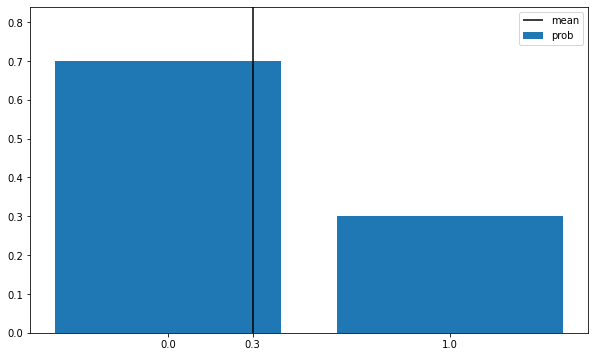

In [7]:
# 중앙선은 기댓값을 나타냄 ( 0.3 )
plot_prob(X)

In [ ]:
# p를 1 - 0.3 = 0.7 로 해서 실험 

p = 0.7
X = Bern(p)

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [ ]:
check_prob(X)

expected value 0.7
variance 0.21


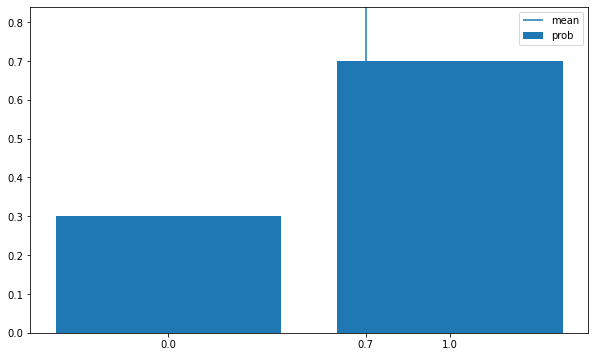

In [ ]:
plot_prob(X)

# scipy.stats 내부 함수 베르누이 분포
 - 베르누이 분포를 따르는 확률변수를 생성하는 bernoulli 함수가 존재
 - pmf 함수는 0,1에서의 확률을 계산할 수 있다.

In [ ]:
# 입력은 p

rv = stats.bernoulli(p)
rv

In [ ]:
# x=0일 때, x=1일 때 확률 구하기
rv.pmf(0), rv.pmf(1)

(0.7000000000000001, 0.3)

In [ ]:
# 이렇게 리스트를 넣어서 한꺼번에 구할 수도 있다.
rv.pmf([0, 1])

array([0.7, 0.3])

In [ ]:
# 누적밀도함수 구하는 함수 cdf
# x=0일때는 동일하게 0.3, x=1일때는 1

rv.cdf([0, 1])

array([0.7, 1. ])

In [ ]:
# 기댓값 & 분산 그냥 쉽게 구할수 있다.

rv.mean(), rv.var()

(0.3, 0.21)

## 이항분포

* 이항분포
 - 성공 확률 = p인 베르누이 시행을 n번 했을 때의 성공 횟수
 - 성공 횟수 : 0 ~ n번, 확률변수가 취할 수 있는 값 : 0 ~ n

* 이항분포의 파라미터 2가지

 - 성공 확률 : p
 - 시행 횟수 : n


* 이항분포의 기댓값 E(X) = np
* 이항분포의 분산 V(X) = np(1-p)

In [ ]:
np.arange(7+1)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
# nCx를 계산하는 함수가 scipy.special에 있는 comb 함수

from scipy.special import comb

# 시행 횟수가 n이므로, 성공횟수 x는 0~n까지.
# arange 함수를 통해 0~n이 들어가는 array 만들기
def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [ ]:
n = 10
p = 0.3
X = Bin(n, p)

In [ ]:
check_prob(X)

expected value 3.0
variance 2.1


In [ ]:
# E(X) = np
# V(X) = np(1-p)
# 이렇게 계산해도 똑같이 나온다.

E2 = n*p
V2 = n*p*(1-p)
E2, V2

(3.000, 2.100)

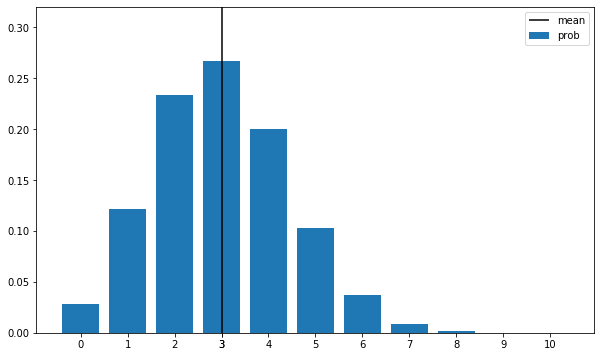

In [ ]:
# 가운데 직선이 기댓값, E
# 이항분포는 기댓값이 정상이 되는 산 모양의 분포

plot_prob(X)

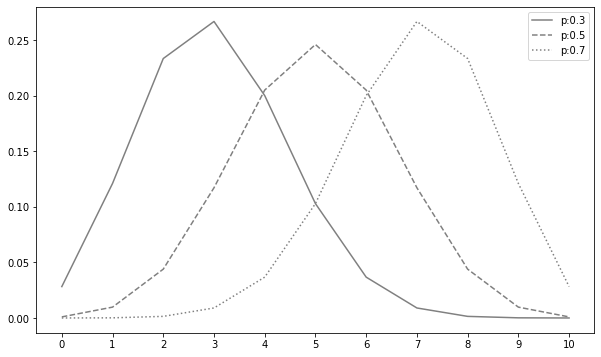

In [ ]:
# scipy.stats에서 이항분포는 binom 함수로 생성 가능

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# 0~n까지 생성하려고
x_set = np.arange(n+1)

# 0.3 0.5 0.7 에 따라 다르게 생성
# 여기서 linestyles가 쓰인다. 그래프를 다르게 표현하기 위해서
for p, ls in zip([0.3, 0.5, 0.7], linestyles):  
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
    
# 0 ~ 10 x좌표 생성    
ax.set_xticks(x_set)
ax.legend()

plt.show()

p가 커질수록 가운데 정상의 위치가 커진다.
p=0.3일 때와 p=0.7일 때와 대칭 관계를 이룬다.

< 이항분포 정리 >

 - 파라미터 : n,p
 - 취할 수 있는 x 값 : 0 ~ n
 - 확률함수
 - 기댓값 : np
 - 분산 : np(1-p)
 - scipy.stats : binom(n,p)

## 기하분포

* 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수
 - 기하분포에서 확률변수가 취할 수 있는 값은 1부터 무한대 ( 무한대라면, 수도 없이 계속해서 실패하는 상황 )
 - x = {1,2,3....}
 - 실패할 확률은 1-p이고, 성공할 확률은 p이므로
 - (1-p)^(x-1) * p가 확률함수가 된다.

* 기하분포의 기댓값과 분산
 - 기댓값(E) = 1/p
 - 분산(V) = (1-p) / (p^2)

In [ ]:
# 기하분포 함수 만들기

def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [ ]:
p = 0.5
X = Ge(p)

In [ ]:
check_prob(X)

expected value 2.0
variance 2.0


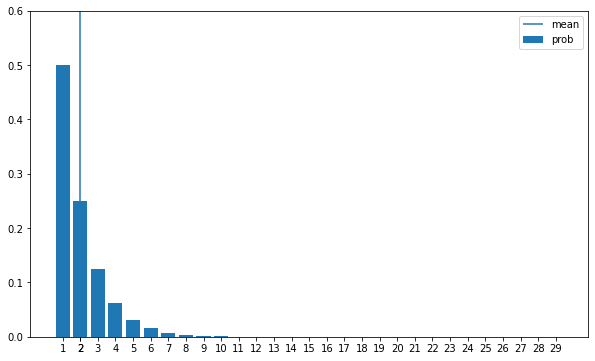

In [ ]:
plot_prob(X)

# 아래 그래프를 보면 10 뒤로는 거의 값이 없는 것처럼 보일 수 있다.
# 분모가 더 큰 진분수 형태가 무한으로 곱해질수록, 0에 가까워질 수밖에 없다.

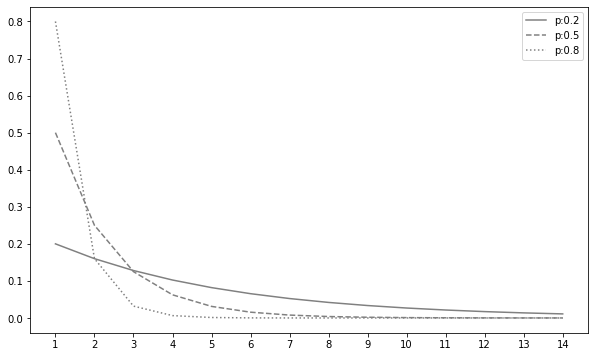

In [ ]:
# p가 0.2, 0.5, 0.8 일때의 기하분포 비교

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# 원래 x는 무한대로 나올 수 있지만, 14까지라고 그냥 가정
x_set = np.arange(1, 15)

# p가 0.2, 0.5, 0.8일 때의 기하분포 비교
# 기하분포는 stats의 geom 함수를 이용해 만들 수 있다.
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

< 기하분포 정리 >
 - 파라미터 : p
 - 취할 수 있는 값 : 1~무한대
 - 확률함수
 - 기댓값 : 1/p
 - 분산 : (1-p)/p^2
 - scipy.stats : geom(p) 함수 사용

## 포아송 분포

 - 임의의 사건이 단위 시간당 발생하는 건수가 따르는 분포
 - 발생하는 건수는 0~n 이라고 생각할 수 있다. 0번 발생 ~ n번 발생
 - 포아송 분포의 파라미터 : λ (발음은 람다) (비율, rate)라고도 한다.
 

< 포아송 분포의 확률함수 >
 : 

< 포아송 분포의 기댓값과 분산 >
 - 기댓값 E(X) = λ
 - 분산 V(X) = λ      

In [ ]:
# 팩토리얼은 scipy.special의 factorial 함수를 이용할 것이다.

from scipy.special import factorial

def Poi(lam):
    # 원래 x는 0 이상의 모든 정수가 가능하지만,
    # 임의로 19까지로 제한
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [ ]:
lam = 3
X = Poi(lam)

In [ ]:
check_prob(X)

expected value 3.0
variance 3.0


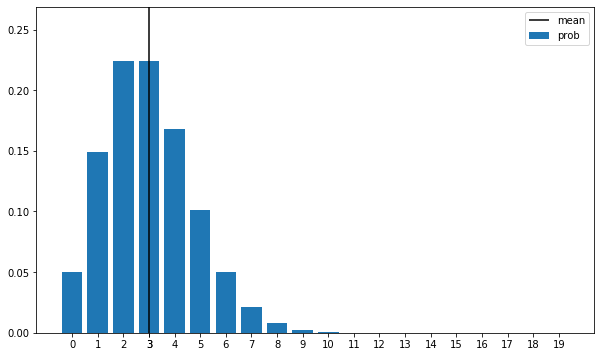

In [ ]:
# 이항분포와 비슷한 형태로 나온다.
# 실제로 이항분포에서 유래된 식이라고 한다.
# λ 위치에서 확률이 최고인 것을 확인할 수 있다.
plot_prob(X)

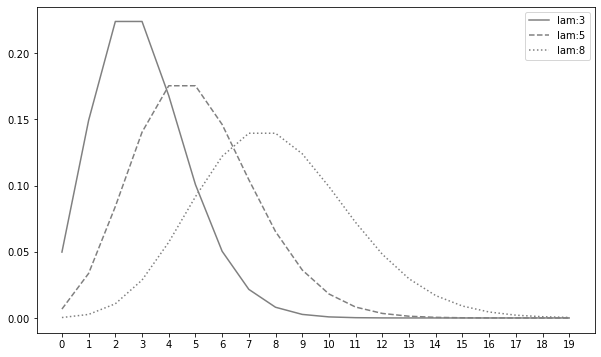

In [ ]:
# scipy.stats에서 poisson 함수를 이용해 바로 구할 수 있다.

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)

# λ 값을 3, 5, 8로 증가시켜 한 그래프에 표현
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()


# 각 포아송 분포는 람다가 커질 때를 비교하고 있으므로
# 람다의 위치에서 각각 정상의 위치에 있음을 알 수 있다.
# 하지만 람다가 커지면 정상의 위치에서의 확률은 작아지는 것을 볼 수 있다.

plt.show()